# 1からシンプルに考え直す.

In [1]:
import sys
sys.path.append("../yandex/")
#sys.path.append("../lib/")
import os
import pandas as pd

import utils
import scoring
import calc_var as cv

#import xgboost
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import swifter

%matplotlib inline
%load_ext autoreload
%autoreload
pd.set_option('display.max_columns', 10000)
pd.set_option("display.max_rows", 200)

/Users/m_nakao/.pyenv/versions/anaconda3-2.4.1/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# データの準備

In [2]:
DATA_PATH = "../your_data_dir/"

In [3]:
train = utils.load_data_csv_part(DATA_PATH, utils.SIMPLE_FEATURE_COLUMNS, "train_part_1")

/Users/m_nakao/.pyenv/versions/anaconda3-2.4.1/envs/py36/lib/python3.6/site-packages/numpy/lib/arraysetops.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


## event数を絞る

In [4]:
sample = train.sample(100000)

### 特徴量の追加

In [5]:
%autoreload

In [6]:
sample = (cv.MeasCalculator()).calc_all(sample)

In [7]:
sample = sample.swifter.apply(
    cv.RowWiseCalculator().calc_all, result_type="expand", axis=1)

Pandas Apply: 100%|██████████| 100000/100000 [09:36<00:00, 173.59it/s]


In [8]:
sample.describe()

ncl[0]         ncl[1]        ncl[2]        ncl[3]  \
count  100000.000000  100000.000000  100000.00000  100000.00000   
mean       62.681490      19.598160      12.47847      13.00422   
std        32.273898      12.734124       7.44557       6.35636   
min         3.000000       0.000000       0.00000       0.00000   
25%        38.000000      10.000000       7.00000       8.00000   
50%        57.000000      17.000000      11.00000      12.00000   
75%        82.000000      26.000000      16.00000      16.00000   
max       249.000000     125.000000      71.00000      77.00000   

           avg_cs[0]      avg_cs[1]      avg_cs[2]      avg_cs[3]  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        2.460229       2.117802       1.444133       1.360777   
std         0.657817       0.779043       0.365152       0.430613   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.000000       1.571428       1.181818       1.125000   
50%         2.384615       2.000000       1.384615       1.285714   
75%         2.814815       2.500000       1.633333       1.500000   
max        10.904762      14.250000      12.000000      15.250000   

                ndof  MatchedHit_TYPE[0]  MatchedHit_TYPE[1]  \
count  100000.000000       100000.000000       100000.000000   
mean        7.932180            1.962220            1.964790   
std         0.397897            0.190665            0.184311   
min         4.000000            1.000000            1.000000   
25%         8.000000            2.000000            2.000000   
50%         8.000000            2.000000            2.000000   
75%         8.000000            2.000000            2.000000   
max         8.000000            2.000000            2.000000   

       MatchedHit_TYPE[2]  MatchedHit_TYPE[3]  MatchedHit_X[0]  \
count       100000.000000       100000.000000    100000.000000   
mean             1.801140            1.789250         0.728626   
std              0.437695            0.449329      1541.697764   
min              0.000000            0.000000     -4829.580000   
25%              2.000000            2.000000      -806.955000   
50%              2.000000            2.000000         8.325000   
75%              2.000000            2.000000       813.075000   
max              2.000000            2.000000      4781.950000   

       MatchedHit_X[1]  MatchedHit_X[2]  MatchedHit_X[3]  MatchedHit_Y[0]  \
count    100000.000000    100000.000000    100000.000000    100000.000000   
mean          0.467808      -159.443641      -180.886541        -1.451801   
std        1683.955140      2206.882966      2337.897958      1348.032271   
min       -5243.800000     -9999.000000     -9999.000000     -3951.223600   
25%        -877.150000     -1025.870000     -1097.070000      -793.841700   
50%           8.885000       -35.570000       -41.370000       -32.562122   
75%         883.185000       918.600000       982.220000       783.449400   
max        5209.310000      5557.000000      5933.120000      3896.812500   

       MatchedHit_Y[1]  MatchedHit_Y[2]  MatchedHit_Y[3]  MatchedHit_Z[0]  \
count    100000.000000    100000.000000    100000.000000    100000.000000   
mean         -2.124147      -163.802808      -178.643228     15261.277421   
std        1451.756007      1985.487666      2086.359768       108.492665   
min       -4259.906700     -9999.000000     -9999.000000     15105.030000   
25%        -857.026370      -958.983150     -1023.974800     15190.771000   
50%         -35.208393       -74.082610       -78.923350     15257.947000   
75%         844.163940       902.111100       932.315700     15332.328000   
max        4204.064000      4511.385300      4819.344700     15418.304000   

       MatchedHit_Z[1]  MatchedHit_Z[2]  MatchedHit_Z[3]  MatchedHit_DX[0]  \
count    100000.000000    100000.000000    100000.000000     100000.000000   
mean      16466.952463     17213.952494     18354.722450         13.4076

In [9]:
sample.columns

Index(['ncl[0]', 'ncl[1]', 'ncl[2]', 'ncl[3]', 'avg_cs[0]', 'avg_cs[1]',
       'avg_cs[2]', 'avg_cs[3]', 'ndof', 'MatchedHit_TYPE[0]',
       ...
       'sq_PT', 'sq_P', 'sigma_x_0', 'sigma_x_1', 'sigma_x_2', 'sigma_x_3',
       'sigma_y_0', 'sigma_y_1', 'sigma_y_2', 'sigma_y_3'],
      dtype='object', length=129)

In [10]:
sample = (cv.MeasCalculator()).calc_meta_sigma(sample)

In [11]:
#sample = sample.drop('sigma_4', axis=1)

In [12]:
sample = (cv.MeasCalculator()).calc_matched_r(sample)

In [13]:
sample.head()

ncl[0]  ncl[1]  ncl[2]  ncl[3]  avg_cs[0]  avg_cs[1]  avg_cs[2]  \
476264      128      17      13      11   2.750000   2.117647   1.461538   
1677517      60      15      23       9   1.950000   1.533333   1.434783   
577494       60       9       5       8   2.633333   2.000000   1.000000   
892731       89       5      17       8   3.393258   1.200000   1.647059   
486918       54       8       4       8   2.092592   1.250000   1.250000   

         avg_cs[3]  ndof  MatchedHit_TYPE[0]  MatchedHit_TYPE[1]  \
476264    1.363636     8                   2                   2   
1677517   1.333333     8                   2                   2   
577494    1.250000     8                   2                   2   
892731    1.125000     8                   2                   2   
486918    1.375000     8                   2                   2   

         MatchedHit_TYPE[2]  MatchedHit_TYPE[3]  MatchedHit_X[0]  \
476264                    2                   2        -1289.130   
1677517                   2                   2        -2685.080   
577494                    1                   1          111.425   
892731                    2                   2          767.925   
486918                    2                   2          247.000   

         MatchedHit_X[1]  MatchedHit_X[2]  MatchedHit_X[3]  MatchedHit_Y[0]  \
476264         -1296.825         -1337.87         -1366.07        568.74950   
1677517        -2954.300         -3140.97         -3357.17      -1628.13240   
577494           119.835           140.40           151.32       -270.76190   
892731           800.685           793.60           849.22       -222.16089   
486918           348.460           418.60           448.32      -1965.15090   

         MatchedHit_Y[1]  MatchedHit_Y[2]  MatchedHit_Y[3]  MatchedHit_Z[0]  \
476264         650.06134        770.39650        902.26650        15321.148   
1677517      -1758.31680      -1887.17990      -2014.60830        15112.236   
577494        -291.95804       -313.28485       -334.82678        15320.025   
892731        -239.80707       -257.48392       -275.47583        15203.199   
486918       -2119.19630      -2273.27220      -2271.26420        15313.924   

         MatchedHit_Z[1]  MatchedHit_Z[2]  MatchedHit_Z[3]  MatchedHit_DX[0]  \
476264         16609.643        17802.875        19011.450         12.750000   
1677517        16315.968        17508.303        18715.945         25.500000   
577494         16527.250        17720.771        18929.594          3.208333   
892731         16410.436        17603.973        18812.809          6.375000   
486918         16520.670        17713.715        18922.621         12.750000   

         MatchedHit_DX[1]  MatchedHit_DX[2]  MatchedHit_DX[3]  \
476264           6.875000         29.500000         31.500000   
1677517         27.500000        118.000000        126.000000   
577494           3.458333         14.833333         15.833333   
892731           6.875000         29.500000         31.500000   
486918          13.750000         59.000000         63.000000   

         MatchedHit_DY[0]  MatchedHit_DY[1]  MatchedHit_DY[2]  \
476264          63.078957         33.979145         36.479130   
1677517        126.278550        136.278490        146.278410   
577494          15.679264         16.929256         18.179249   
892731          31.479162         33.979145         36.479130   
486918          63.078957         68.078926         73.078896   

         MatchedHit_DY[3]  MatchedHit_DZ[0]  MatchedHit_DZ[1]  \
476264          38.979115         33.727364         33.622578   
1677517        156.278350         33.954950         33.990960   
577494          19.429240         33.556680         33.561180   
892731          38.979115         33.613575         33.622578   
486918          78.078860         33.727364         33.745370   

         MatchedHit_DZ[2]  MatchedHit_DZ[3]  MatchedHit_T[0]  MatchedHit_T[1]  \
476264          33.631580         33.640583      

In [14]:
sample.dtypes

ncl[0]                       int64
ncl[1]                       int64
ncl[2]                       int64
ncl[3]                       int64
avg_cs[0]                  float64
avg_cs[1]                  float64
avg_cs[2]                  float64
avg_cs[3]                  float64
ndof                         int64
MatchedHit_TYPE[0]           int64
MatchedHit_TYPE[1]           int64
MatchedHit_TYPE[2]           int64
MatchedHit_TYPE[3]           int64
MatchedHit_X[0]            float64
MatchedHit_X[1]            float64
MatchedHit_X[2]            float64
MatchedHit_X[3]            float64
MatchedHit_Y[0]            float64
MatchedHit_Y[1]            float64
MatchedHit_Y[2]            float64
MatchedHit_Y[3]            float64
MatchedHit_Z[0]            float64
MatchedHit_Z[1]            float64
MatchedHit_Z[2]            float64
MatchedHit_Z[3]            float64
MatchedHit_DX[0]           float64
MatchedHit_DX[1]           float64
MatchedHit_DX[2]           float64
MatchedHit_DX[3]    

#  特徴量選択
- 特徴量選択に学習と同じデータを使わない.
- 特徴量選択にdecision treeなどを使わない.

In [62]:
x_cols = [col for col in sample.columns if col not in ['label','particle_type', 
                                                       'FOI_hits_X', 'FOI_hits_Y', 'FOI_hits_Z', 'FOI_hits_DX', 'FOI_hits_DY', 'FOI_hits_DZ',
                                                        'FOI_hits_T', 'FOI_hits_DT', 'FOI_hits_S']]

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(sample[col].values, sample.label.values)[0,1])
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(values), color='y')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient")
#autolabel(rects)
plt.grid(True)
plt.show()

In [64]:
sample_wo_pro = sample[sample['particle_type'] != 2]
sus_wo_pro = sus[sus['particle_type'] != 2]

In [39]:
sample_wo_pro.describe()

ncl[0]        ncl[1]        ncl[2]        ncl[3]     avg_cs[0]  \
count  96982.000000  96982.000000  96982.000000  96982.000000  96982.000000   
mean      62.561857     19.468716     12.426656     13.013198      2.462905   
std       32.114063     12.539751      7.396862      6.352303      0.654940   
min        3.000000      1.000000      0.000000      0.000000      1.000000   
25%       38.000000     10.000000      7.000000      8.000000      2.013158   
50%       57.000000     17.000000     11.000000     12.000000      2.384615   
75%       81.000000     26.000000     16.000000     16.000000      2.819124   
max      275.000000    134.000000     75.000000     72.000000     10.103448   

          avg_cs[1]     avg_cs[2]     avg_cs[3]          ndof  \
count  96982.000000  96982.000000  96982.000000  96982.000000   
mean       2.112010      1.444997      1.358362      7.931348   
std        0.770914      0.367997      0.429352      0.402133   
min        1.000000      0.000000      0.000000      4.000000   
25%        1.571428      1.181818      1.125000      8.000000   
50%        2.000000      1.384615      1.285714      8.000000   
75%        2.500000      1.631579      1.500000      8.000000   
max       13.352942     12.600000     16.500000      8.000000   

       MatchedHit_TYPE[0]  MatchedHit_TYPE[1]  MatchedHit_TYPE[2]  \
count        96982.000000        96982.000000        96982.000000   
mean             1.969438            1.971881            1.809748   
std              0.172130            0.165313            0.431781   
min              1.000000            1.000000            0.000000   
25%              2.000000            2.000000            2.000000   
50%              2.000000            2.000000            2.000000   
75%              2.000000            2.000000            2.000000   
max              2.000000            2.000000            2.000000   

       MatchedHit_TYPE[3]  MatchedHit_X[0]  MatchedHit_X[1]  MatchedHit_X[2]  \
count        96982.000000     96982.000000     96982.000000     96982.000000   
mean             1.797261        -0.261894        -0.663843      -162.905468   
std              0.444874      1558.257545      1702.244341      2225.043077   
min              0.000000     -4811.180000     -5243.800000     -9999.000000   
25%              2.000000      -832.455000      -904.650000     -1060.870000   
50%              2.000000         7.558333         8.068334       -37.870000   
75%              2.000000       833.500000       903.935000       970.600000   
max              2.000000      4832.950000      5209.310000      5557.000000   

       MatchedHit_X[3]  MatchedHit_Y[0]  MatchedHit_Y[1]  MatchedHit_Y[2]  \
count     96982.000000     96982.000000     96982.000000      96982.00000   
mean       -184.241461        -2.664460        -3.115436       -165.10135   
std        2359.038033      1359.688175      1464.987676       1997.87250   
min       -9999.000000     -3951.223600     -4259.906700      -9999.00000   
25%       -1134.170000      -798.444100      -860.106900       -992.08960   
50%         -41.370000       -32.562122       -35.208393        -74.08261   
75%        1038.220000       810.334900       874.588200        906.19946   
max        5933.120000      3898.132300      4205.364300       4512.69530   

       MatchedHit_Y[3]  MatchedHit_Z[0]  MatchedHit_Z[1]  MatchedHit_Z[2]  \
count     96982.000000     96982.000000     96982.000000     96982.000000   
mean       -184.153043     15260.429159     16466.172136     17211.610739   
std        2105.642478       108.612424       108.809521      3492.177846   
min       -9999.000000     15105.030000     16308.190000     -9999.000000   
25%       -1058.572000     15132.151000     16338.471000     17527.088000   
50%         -78.923350     15214.409000     16422.530000     17613.020000   
75%         964.472350     15330.579000     16538.629000     17730.867000   
max        4819.811000     15418.304000     16626.639000     1

In [65]:
sample_wo_pi = sample[sample['particle_type'] != 0]
sus_wo_pi = sus[sus['particle_type'] != 0]

In [41]:
sample_wo_pi.describe()

ncl[0]        ncl[1]        ncl[2]        ncl[3]     avg_cs[0]  \
count  95304.000000  95304.000000  95304.000000  95304.000000  95304.000000   
mean      63.070826     19.656006     12.542779     13.106711      2.467494   
std       32.248323     12.608311      7.432493      6.368154      0.655060   
min        3.000000      0.000000      1.000000      1.000000      1.000000   
25%       39.000000     10.000000      7.000000      9.000000      2.018868   
50%       58.000000     17.000000     11.000000     12.000000      2.388060   
75%       82.000000     26.000000     16.000000     16.000000      2.822581   
max      275.000000    134.000000     75.000000     72.000000     10.103448   

          avg_cs[1]     avg_cs[2]     avg_cs[3]          ndof  \
count  95304.000000  95304.000000  95304.000000  95304.000000   
mean       2.118250      1.446754      1.359406      7.944095   
std        0.770475      0.366131      0.420649      0.365192   
min        0.000000      1.000000      1.000000      4.000000   
25%        1.571428      1.193548      1.125000      8.000000   
50%        2.000000      1.384615      1.285714      8.000000   
75%        2.500000      1.636364      1.500000      8.000000   
max       13.352942     12.600000     11.333333      8.000000   

       MatchedHit_TYPE[0]  MatchedHit_TYPE[1]  MatchedHit_TYPE[2]  \
count        95304.000000        95304.000000        95304.000000   
mean             1.971449            1.973758            1.813911   
std              0.166541            0.159856            0.418389   
min              1.000000            1.000000            0.000000   
25%              2.000000            2.000000            2.000000   
50%              2.000000            2.000000            2.000000   
75%              2.000000            2.000000            2.000000   
max              2.000000            2.000000            2.000000   

       MatchedHit_TYPE[3]  MatchedHit_X[0]  MatchedHit_X[1]  MatchedHit_X[2]  \
count        95304.000000     95304.000000     95304.000000     95304.000000   
mean             1.797312        -0.161937        -0.344069      -118.843109   
std              0.440370      1564.683909      1709.603824      2134.224373   
min              0.000000     -4811.180000     -5243.800000     -9999.000000   
25%              2.000000      -832.455000      -907.100000     -1042.870000   
50%              2.000000         8.325000         8.885000       -35.570000   
75%              2.000000       833.500000       903.935000       970.600000   
max              2.000000      4832.950000      5209.310000      5557.000000   

       MatchedHit_X[3]  MatchedHit_Y[0]  MatchedHit_Y[1]  MatchedHit_Y[2]  \
count     95304.000000     95304.000000     95304.000000     95304.000000   
mean       -164.456593        -4.096815        -4.525649      -122.809692   
std        2325.341124      1359.727663      1465.417205      1889.367978   
min       -9999.000000     -3951.223600     -4259.906700     -9999.000000   
25%       -1134.170000      -797.960940      -860.106900      -958.983150   
50%         -41.370000       -32.562122       -35.208393       -57.294315   
75%        1038.220000       810.334900       845.585900       906.199460   
max        5933.120000      3898.132300      4205.364300      4512.695300   

       MatchedHit_Y[3]  MatchedHit_Z[0]  MatchedHit_Z[1]  MatchedHit_Z[2]  \
count     95304.000000     95304.000000     95304.000000     95304.000000   
mean       -165.210657     15260.495964     16466.286232     17333.377915   
std        2059.526490       108.621599       108.764779      2987.913048   
min       -9999.000000     15105.030000     16308.190000     -9999.000000   
25%       -1057.518300     15132.151000     16340.415000     17528.980000   
50%         -78.923350     15216.130000     16422.530000     17613.244000   
75%         963.418640     15330.579000     16538.629000     17730.867000   
max        4819.811000     15418.304000     16626.639000     1

In [66]:
sample_wo_mu = sample[sample['particle_type'] != 1]
sus_wo_mu = sus[sus['particle_type'] != 1]

In [43]:
sample_wo_mu.describe()

ncl[0]       ncl[1]      ncl[2]       ncl[3]    avg_cs[0]  \
count  7714.000000  7714.000000  7714.00000  7714.000000  7714.000000   
mean     60.940368    18.366217    11.56015    11.846772     2.504127   
std      34.311514    13.379812     7.89401     6.593933     0.715315   
min       4.000000     0.000000     0.00000     0.000000     1.000000   
25%      35.000000     8.000000     6.00000     7.000000     2.000000   
50%      54.000000    15.000000    10.00000    11.000000     2.406687   
75%      80.000000    25.000000    15.00000    15.000000     2.888441   
max     249.000000    99.000000    56.00000    50.000000     8.327868   

         avg_cs[1]    avg_cs[2]    avg_cs[3]         ndof  MatchedHit_TYPE[0]  \
count  7714.000000  7714.000000  7714.000000  7714.000000         7714.000000   
mean      2.150206     1.470157     1.368515     7.741509            1.758232   
std       0.870421     0.408569     0.526494     0.718030            0.428182   
min       0.000000     0.000000     0.000000     4.000000            1.000000   
25%       1.545454     1.181818     1.111111     8.000000            2.000000   
50%       2.000000     1.403704     1.277778     8.000000            2.000000   
75%       2.548387     1.666667     1.500000     8.000000            2.000000   
max      12.920000     5.000000    16.500000     8.000000            2.000000   

       MatchedHit_TYPE[1]  MatchedHit_TYPE[2]  MatchedHit_TYPE[3]  \
count         7714.000000         7714.000000         7714.000000   
mean             1.739176            1.472129            1.501037   
std              0.439113            0.639114            0.591053   
min              1.000000            0.000000            0.000000   
25%              1.000000            1.000000            1.000000   
50%              2.000000            2.000000            2.000000   
75%              2.000000            2.000000            2.000000   
max              2.000000            2.000000            2.000000   

       MatchedHit_X[0]  MatchedHit_X[1]  MatchedHit_X[2]  MatchedHit_X[3]  \
count      7714.000000      7714.000000      7714.000000      7714.000000   
mean          7.474258         6.277451      -787.370012      -488.158407   
std        1098.122911      1193.282352      2989.090815      2552.405909   
min       -4676.580000     -5156.200000     -9999.000000     -9999.000000   
25%        -439.192495      -441.050000      -730.870000      -641.570000   
50%           8.758333         9.168333       -50.670000       -38.970000   
75%         437.975000       440.660000       406.400000       458.286650   
max        4832.950000      5209.310000      5557.000000      5933.120000   

       MatchedHit_Y[0]  MatchedHit_Y[1]  MatchedHit_Y[2]  MatchedHit_Y[3]  \
count      7714.000000      7714.000000      7714.000000      7714.000000   
mean        -10.977111       -11.511146      -809.779933      -517.515057   
std         964.413131      1028.621672      2906.580002      2462.191174   
min       -3951.223600     -4259.906700     -9999.000000     -9999.000000   
25%        -476.160550      -496.556730      -694.590200      -661.919560   
50%         -80.444970       -70.730156      -221.993260      -195.820100   
75%         454.734700       486.618700       486.104640       522.469000   
max        3896.812500      4204.064000      4511.385300      4819.344700   

       MatchedHit_Z[0]  MatchedHit_Z[1]  MatchedHit_Z[2]  MatchedHit_Z[3]  \
count      7714.000000      7714.000000      7714.000000      7714.000000   
mean      15267.040672     16474.279268     15464.971365     17442.548676   
std         108.326284       107.701868      7489.468158      6273.592129   
min       15105.030000     16308.190000     -9999.000000     -9999.000000   
25%       15197.880000     16403.846000     17522.191000     18733.691000   
50%       15315.900000     16520.442500     17610.922000     18913.490000   
75%       15397.821000     16602.900000     17730.471500     19001.690000  

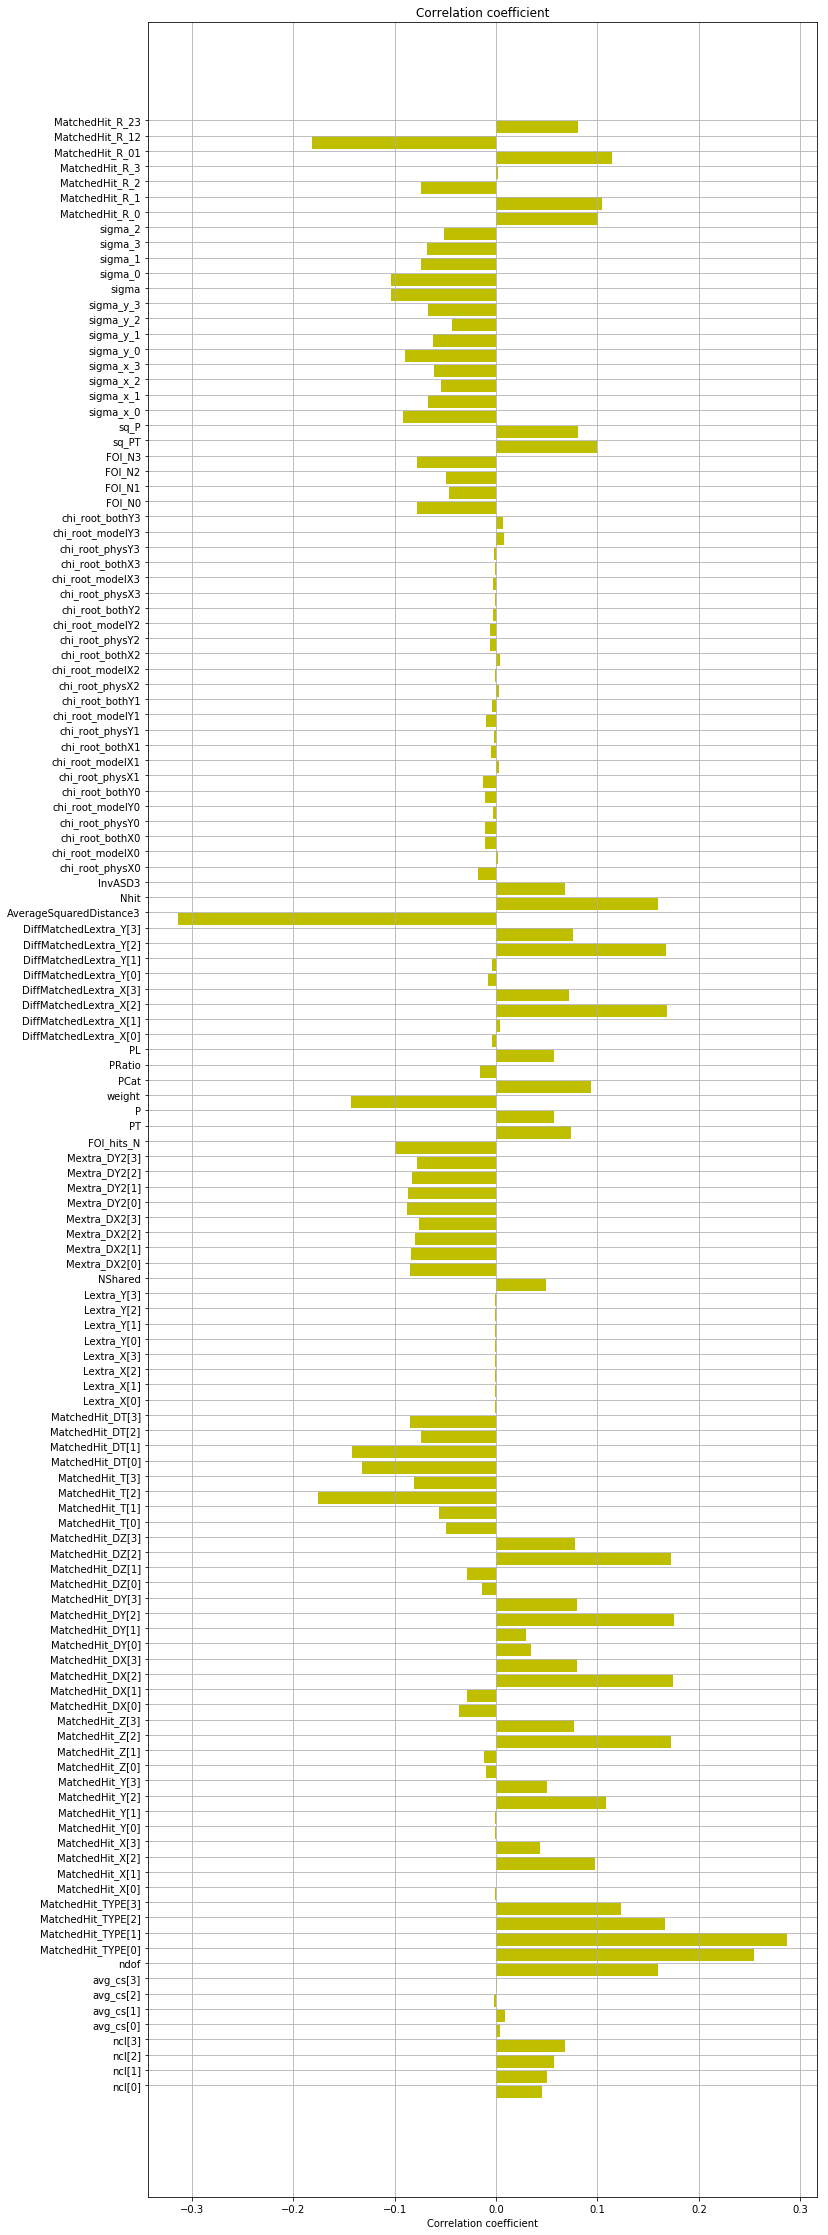

In [50]:
x_cols = [col for col in sample_wo_pro.columns if col not in ['label','particle_type', 
                                                       'FOI_hits_X', 'FOI_hits_Y', 'FOI_hits_Z', 'FOI_hits_DX', 'FOI_hits_DY', 'FOI_hits_DZ',
                                                        'FOI_hits_T', 'FOI_hits_DT', 'FOI_hits_S']]

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(sample_wo_pro[col].values, sample_wo_pro.label.values)[0,1])
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(values), color='y')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient")
#autolabel(rects)
plt.grid(True)
plt.show()

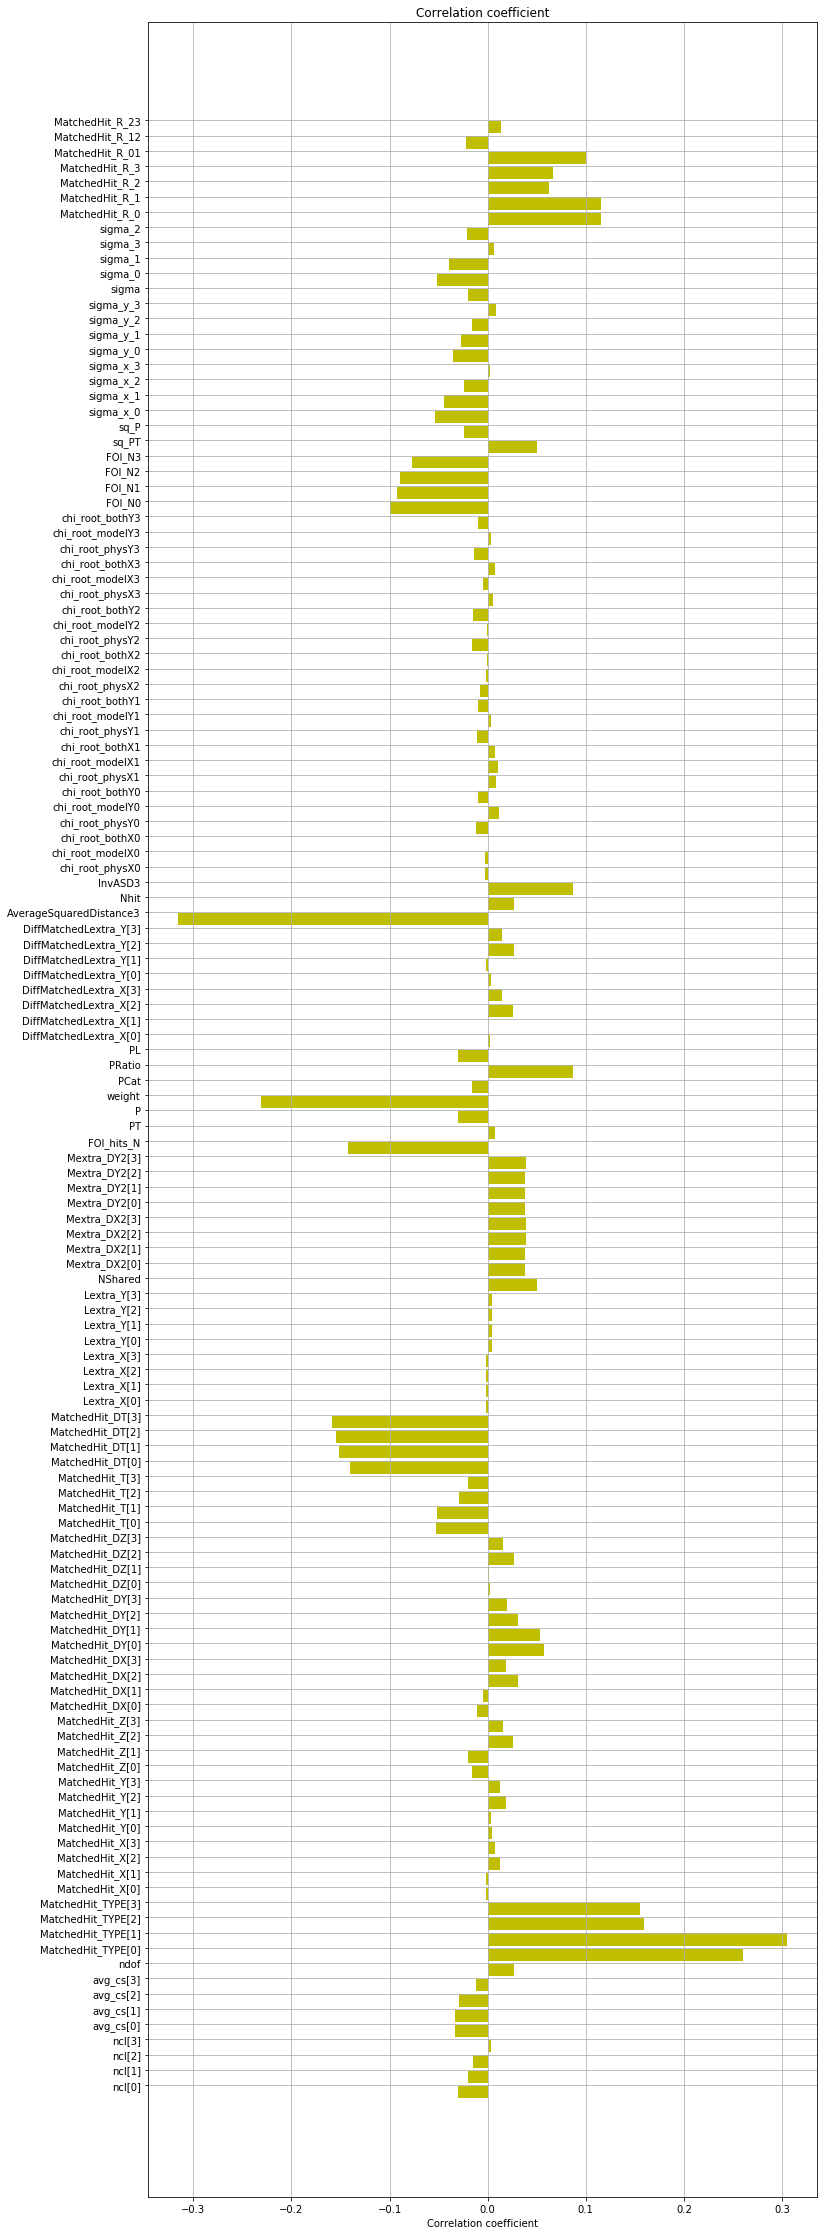

In [51]:
x_cols = [col for col in sample_wo_pi.columns if col not in ['label','particle_type', 
                                                       'FOI_hits_X', 'FOI_hits_Y', 'FOI_hits_Z', 'FOI_hits_DX', 'FOI_hits_DY', 'FOI_hits_DZ',
                                                        'FOI_hits_T', 'FOI_hits_DT', 'FOI_hits_S']]

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(sample_wo_pi[col].values, sample_wo_pi.label.values)[0,1])
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(values), color='y')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient")
#autolabel(rects)
plt.grid(True)
plt.show()

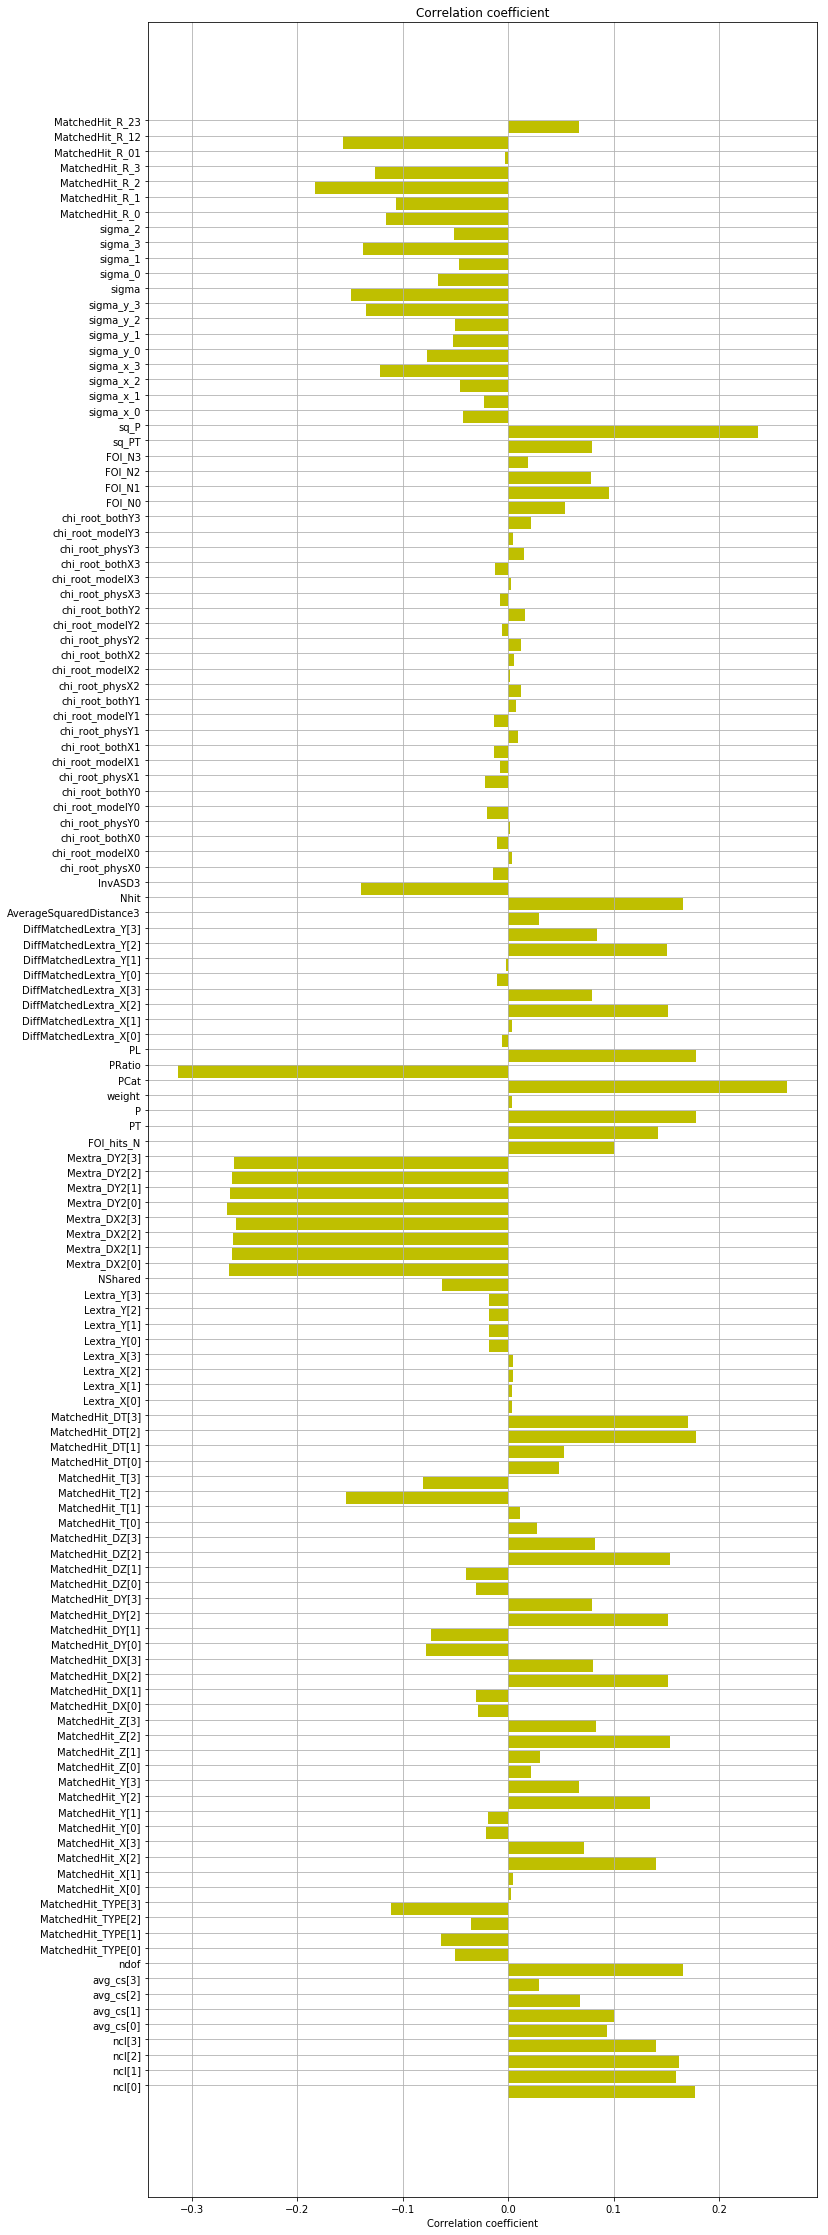

In [52]:
x_cols = [col for col in sample_wo_mu.columns if col not in ['label','particle_type', 
                                                       'FOI_hits_X', 'FOI_hits_Y', 'FOI_hits_Z', 'FOI_hits_DX', 'FOI_hits_DY', 'FOI_hits_DZ',
                                                        'FOI_hits_T', 'FOI_hits_DT', 'FOI_hits_S']]

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(sample_wo_mu[col].values, sample_wo_mu.particle_type.values)[0,1])
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(values), color='y')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient")
#autolabel(rects)
plt.grid(True)
plt.show()

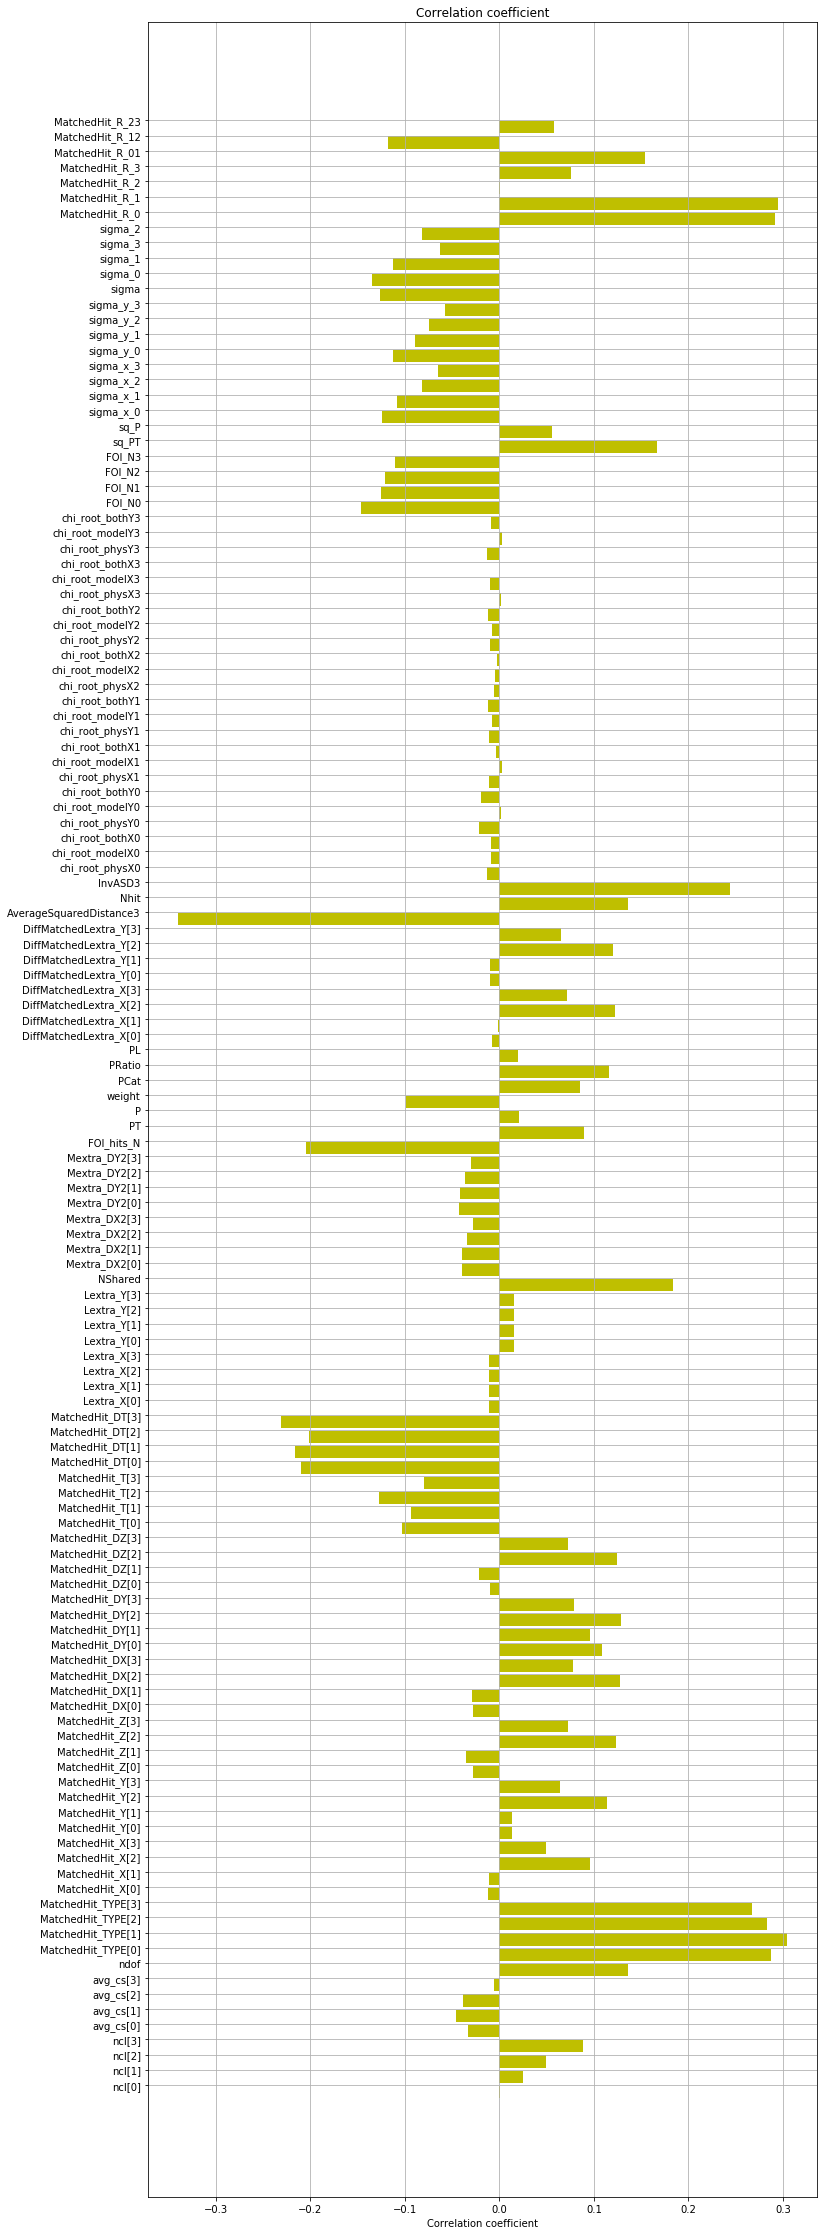

In [61]:
x_cols = [col for col in sus.columns if col not in ['label','particle_type', 
                                                       'FOI_hits_X', 'FOI_hits_Y', 'FOI_hits_Z', 'FOI_hits_DX', 'FOI_hits_DY', 'FOI_hits_DZ',
                                                        'FOI_hits_T', 'FOI_hits_DT', 'FOI_hits_S']]

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(sus[col].values, sus.label.values)[0,1])
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(values), color='y')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient")
#autolabel(rects)
plt.grid(True)
plt.show()

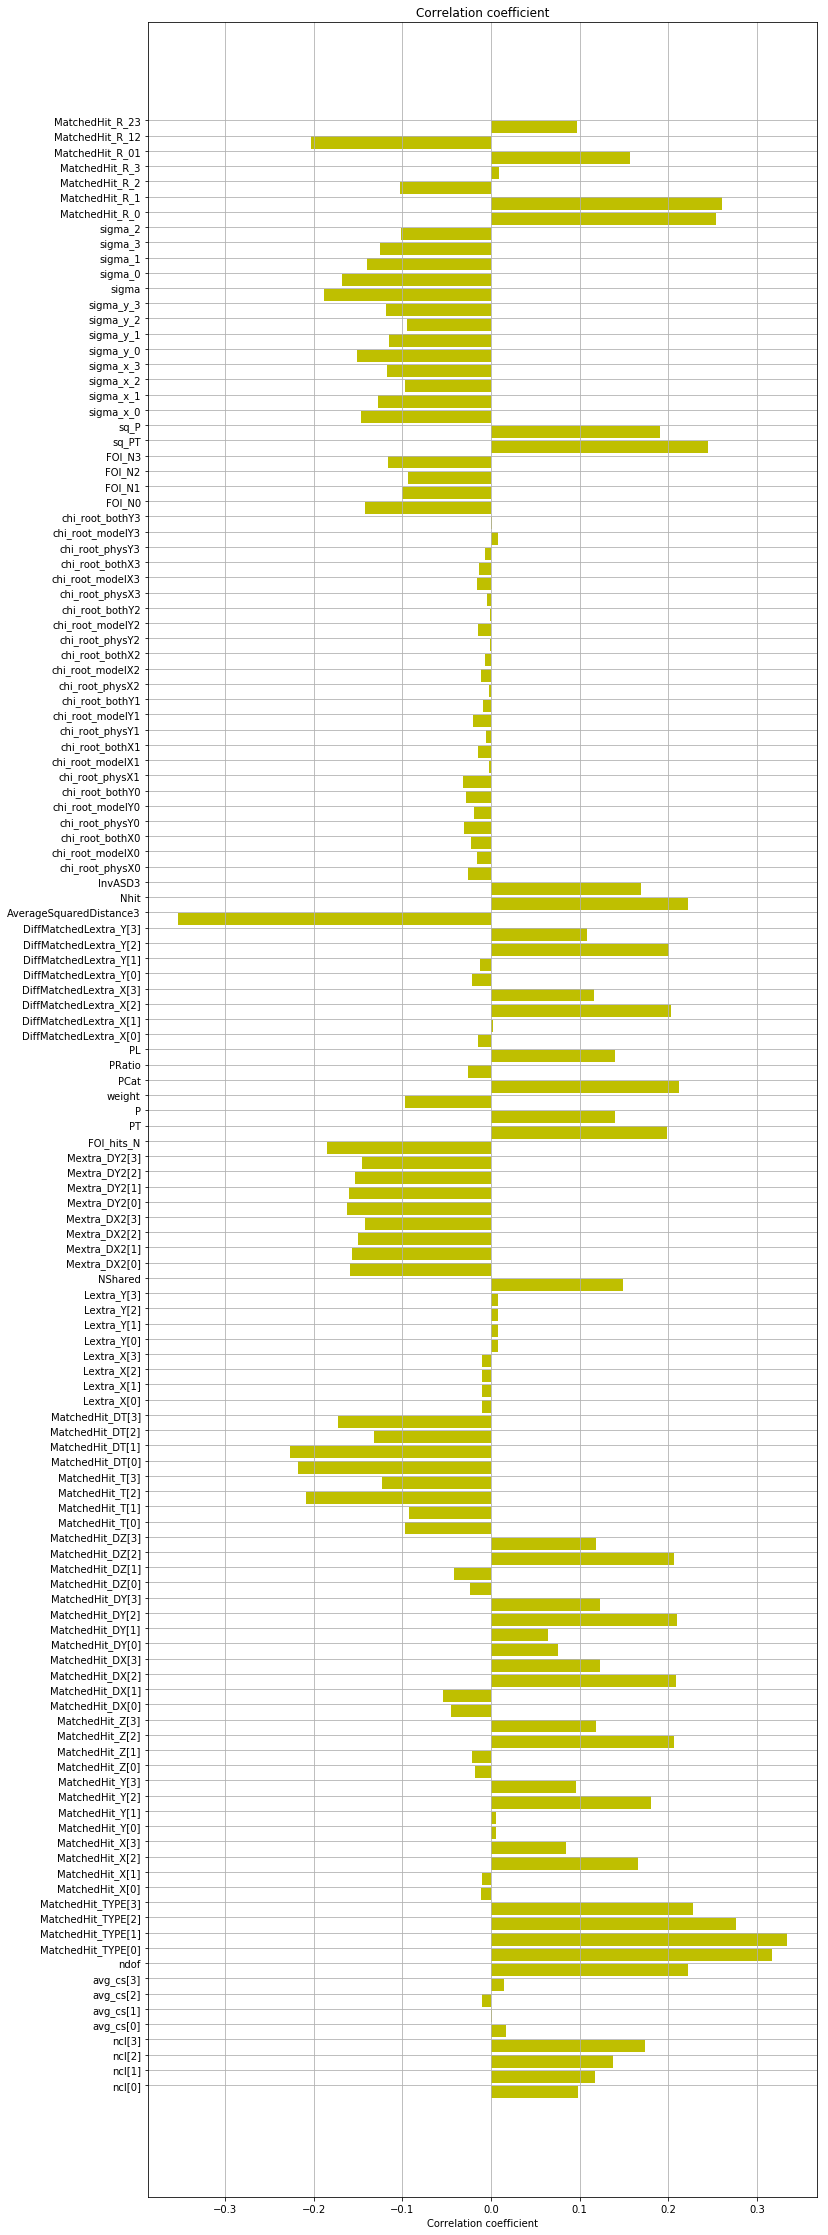

In [67]:
x_cols = [col for col in sus_wo_pro.columns if col not in ['label','particle_type', 
                                                       'FOI_hits_X', 'FOI_hits_Y', 'FOI_hits_Z', 'FOI_hits_DX', 'FOI_hits_DY', 'FOI_hits_DZ',
                                                        'FOI_hits_T', 'FOI_hits_DT', 'FOI_hits_S']]

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(sus_wo_pro[col].values, sus_wo_pro.label.values)[0,1])
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(values), color='y')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient")
#autolabel(rects)
plt.grid(True)
plt.show()

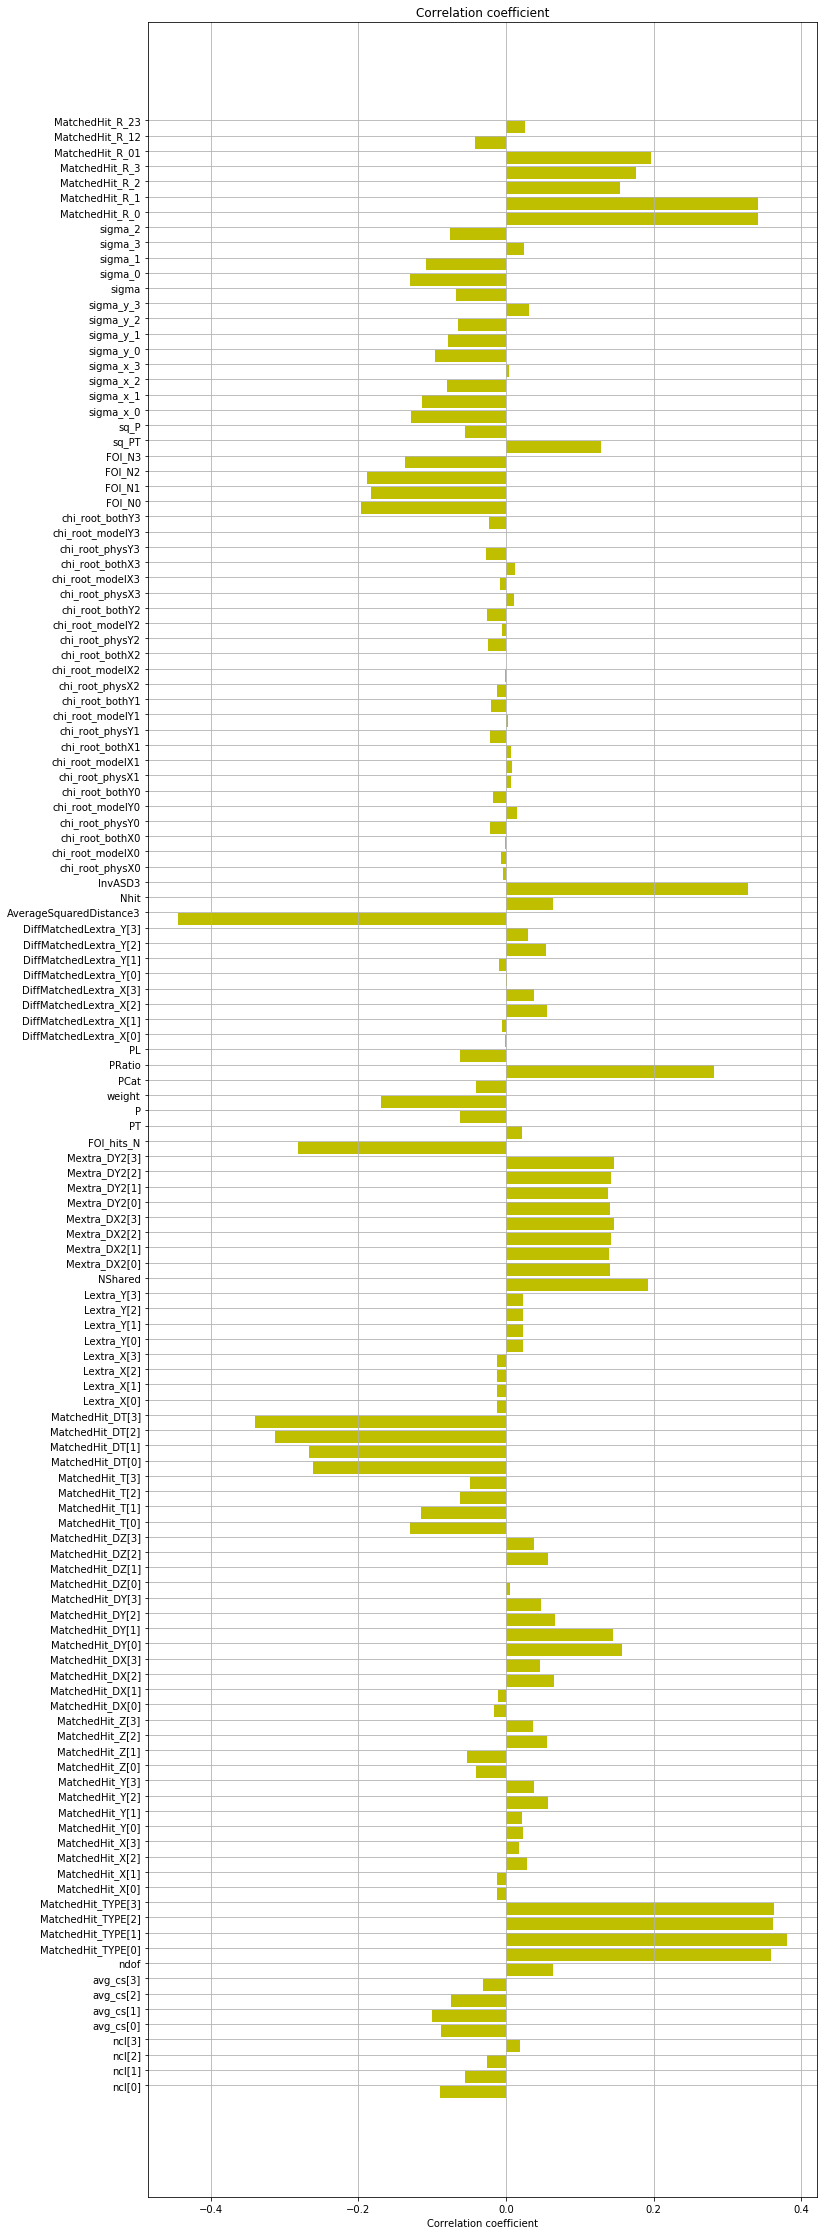

In [68]:
x_cols = [col for col in sus_wo_pi.columns if col not in ['label','particle_type', 
                                                       'FOI_hits_X', 'FOI_hits_Y', 'FOI_hits_Z', 'FOI_hits_DX', 'FOI_hits_DY', 'FOI_hits_DZ',
                                                        'FOI_hits_T', 'FOI_hits_DT', 'FOI_hits_S']]

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(sus_wo_pi[col].values, sus_wo_pi.label.values)[0,1])
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(values), color='y')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient")
#autolabel(rects)
plt.grid(True)
plt.show()

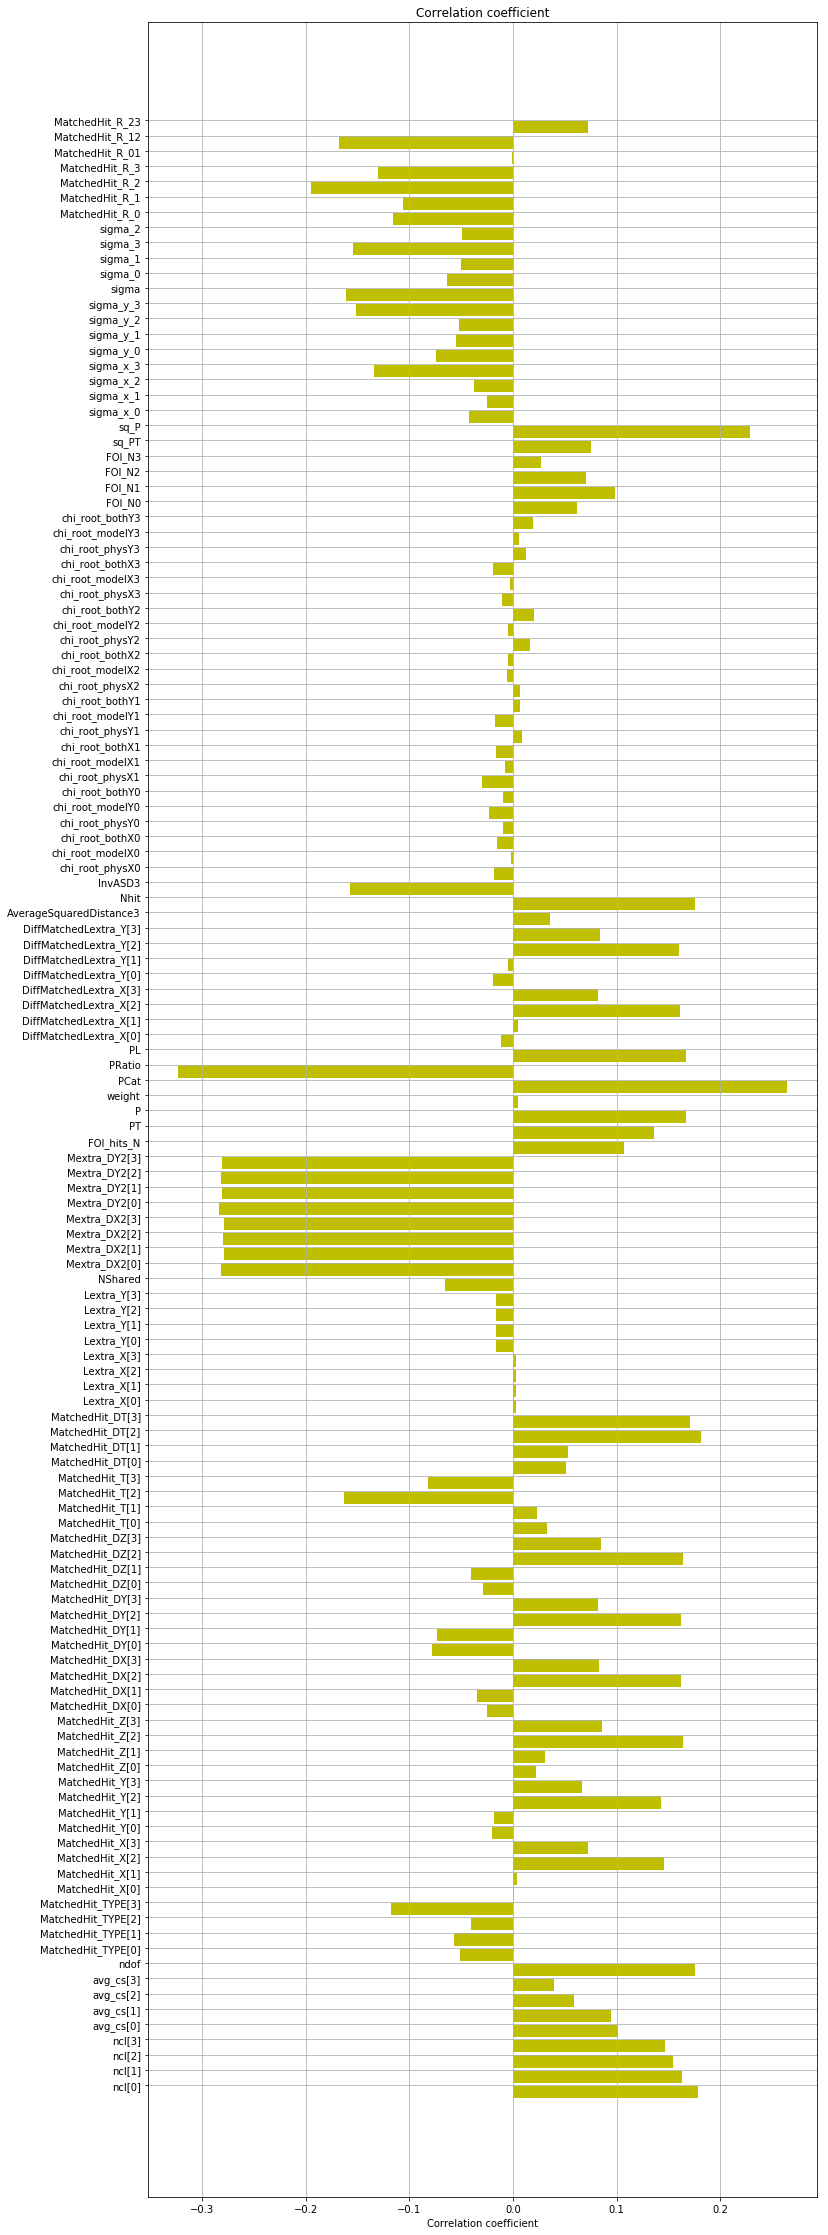

In [69]:
x_cols = [col for col in sus_wo_mu.columns if col not in ['label','particle_type', 
                                                       'FOI_hits_X', 'FOI_hits_Y', 'FOI_hits_Z', 'FOI_hits_DX', 'FOI_hits_DY', 'FOI_hits_DZ',
                                                        'FOI_hits_T', 'FOI_hits_DT', 'FOI_hits_S']]

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(sus_wo_mu[col].values, sus_wo_mu.particle_type.values)[0,1])
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(values), color='y')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient")
#autolabel(rects)
plt.grid(True)
plt.show()

## event数調整

In [54]:
muons = len(sample[sample['particle_type']==1])
print("muons: "+ str(muons))
pions = len(sample[sample['particle_type']==0])
print("pions: "+ str(pions))
protons = len(sample[sample['particle_type']==2])
print("protons: "+ str(protons))

muons: 92286
pions: 4696
protons: 3018


In [55]:
# muon /protons
ratio = 1
muons_number = protons * ratio
pions_number = protons * 1
protons_number = protons
#muons_number = muons
#protons_number = protons
#pions_number = pions

In [56]:
pion_under_sampled = sample[sample['particle_type']==0].sample(pions_number)
muon_under_sampled = sample[sample['particle_type']==1].sample(muons_number)
proton_under_sampled = sample[sample['particle_type']==2].sample(protons_number)

In [57]:
selected_under_sampled = pd.concat([muon_under_sampled, 
                                                                    proton_under_sampled, 
                                                                    pion_under_sampled])

In [58]:
muons = len(selected_under_sampled[selected_under_sampled['particle_type']==1])
print("muons: "+ str(muons))
pions = len(selected_under_sampled[selected_under_sampled['particle_type']==0])
print("pions: "+ str(pions))
protons = len(selected_under_sampled[selected_under_sampled['particle_type']==2])
print("protons: "+ str(protons))

muons: 3018
pions: 3018
protons: 3018


In [59]:
sus = selected_under_sampled

In [17]:
sus.head()

ncl[0]  ncl[1]  ncl[2]  ncl[3]  avg_cs[0]  avg_cs[1]  avg_cs[2]  \
5098502      64      19      19      12   2.656250   2.210526   1.631579   
3955533      23      11       6       8   1.826087   2.181818   1.666667   
1440265      28       9       8       5   1.892857   1.000000   1.125000   
2309255      51      13      14      22   4.235294   1.692308   2.357143   
42304        47      16       9      14   3.808511   2.125000   1.222222   

         avg_cs[3]  ndof  MatchedHit_TYPE[0]  MatchedHit_TYPE[1]  \
5098502   1.166667     8                   2                   2   
3955533   1.500000     8                   2                   2   
1440265   1.000000     8                   2                   2   
2309255   1.454546     8                   2                   2   
42304     1.285714     8                   1                   2   

         MatchedHit_TYPE[2]  MatchedHit_TYPE[3]  MatchedHit_X[0]  \
5098502                   2                   2      -1145.78000   
3955533                   2                   2      -1595.13000   
1440265                   2                   2       1263.60000   
2309255                   2                   2      -1301.88000   
42304                     1                   1       -469.08835   

         MatchedHit_X[1]  MatchedHit_X[2]  MatchedHit_X[3]  MatchedHit_Y[0]  \
5098502        -1182.100      -1296.87000      -1134.17000     -3629.119400   
3955533        -1775.950      -1947.87000      -2080.67000      -825.441470   
1440265         1391.560       1450.60000       1551.82000       -63.759434   
2309255        -1404.700      -1534.87000      -1639.67000     -2409.331300   
42304           -513.675       -553.50336       -591.80334       125.052376   

         MatchedHit_Y[1]  MatchedHit_Y[2]  MatchedHit_Y[3]  MatchedHit_Z[0]  \
5098502     -3918.002700      -4205.66500      -4491.69240        15105.030   
3955533      -891.126160       -955.48980      -1018.41860        15316.128   
1440265       -68.905685        -74.08261        -79.57462        15119.770   
2309255     -2599.015100      -2787.47800      -2974.40600        15310.424   
42304         185.016860        198.70270        213.92343        15319.551   

         MatchedHit_Z[1]  MatchedHit_Z[2]  MatchedHit_Z[3]  MatchedHit_DX[0]  \
5098502        16308.190        17499.955        18707.023         25.500000   
3955533        16520.092        17712.660        18920.533         12.750000   
1440265        16327.051        17520.633        18729.512         12.750000   
2309255        16513.941        17706.062        18913.490         25.500000   
42304          16523.967        17716.816        18924.970          3.208333   

         MatchedHit_DX[1]  MatchedHit_DX[2]  MatchedHit_DX[3]  \
5098502         27.500000        118.000000        126.000000   
3955533         13.750000         59.000000         63.000000   
1440265         13.750000         59.000000         63.000000   
2309255         27.500000        118.000000        126.000000   
42304            3.458333         14.833333         15.833333   

         MatchedHit_DY[0]  MatchedHit_DY[1]  MatchedHit_DY[2]  \
5098502        126.278550        136.278490        146.278410   
3955533         63.078957         68.078926         73.078896   
1440265         63.078957         68.078926         73.078896   
2309255        126.278550        136.278490        146.278410   
42304          126.278550         16.929256         18.179249   

         MatchedHit_DY[3]  MatchedHit_DZ[0]  MatchedHit_DZ[1]  \
5098502         156.27835         33.954950          33.99096   
3955533          78.07886         33.727364          33.74537   
1440265          78.07886         33.727364          33.74537   
2309255         156.27835         33.954950          33.99096   
42304            19.42924         33.954950          33.56118   

         MatchedHit_DZ[2]  MatchedHit_DZ[3]  MatchedHit_T[0]  MatchedHit_T[1]  \
5098502         34.026966         34.062977      

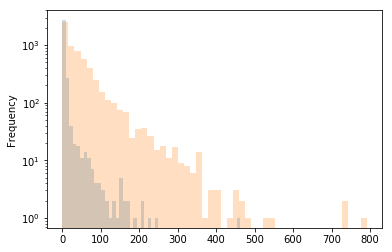

In [18]:
name = 'AverageSquaredDistance3'
sus[sus['particle_type']==1].loc[:, name].plot.hist(bins=50, alpha=0.25, logy=True)
sus[sus['particle_type']!=1].loc[:, name].plot.hist(bins=50, alpha=0.25, logy=True)
#sus[sus['particle_type']==2].loc[:, 'InvASD3'].plot.hist(bins=50, alpha=0.25, logy=True)

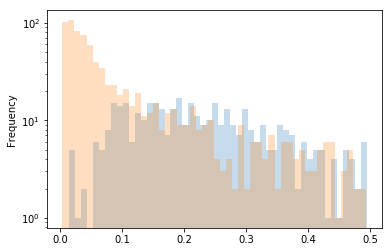

In [19]:
name = 'InvASD3'
sus[(sus['particle_type']==1) & (sus[name] <= 0.5) & (sus['PCat'] == 4)].loc[:, name].plot.hist(bins=50, alpha=0.25, logy=True)
sus[(sus['particle_type']!=1) & (sus[name] <= 0.5) & (sus['PCat'] == 4)].loc[:, name].plot.hist(bins=50, alpha=0.25, logy=True)
#sus[sus['particle_type']==2].loc[:, 'InvASD3'].plot.hist(bins=50, alpha=0.25, logy=True)

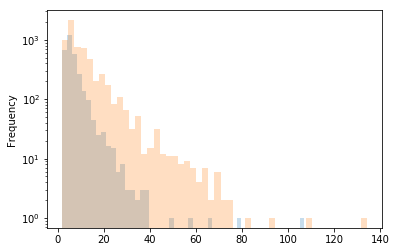

In [20]:
name = 'FOI_hits_N'
sus[sus['particle_type']==1].loc[:, name].plot.hist(bins=50, alpha=0.25, logy=True)
sus[sus['particle_type']!=1].loc[:, name].plot.hist(bins=50, alpha=0.25, logy=True)
#sus[sus['particle_type']==2].loc[:, 'InvASD3'].plot.hist(bins=50, alpha=0.25, logy=True)

In [21]:
mask = (sus['PCat'] > 2) & (sus['PCat'] < 6)

In [22]:
sus2 = sus[mask]

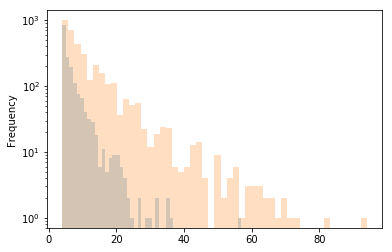

In [23]:
name = 'FOI_hits_N'
sus2[sus2['particle_type']==1].loc[:, name].plot.hist(bins=50, alpha=0.25, logy=True)
sus2[sus2['particle_type']!=1].loc[:, name].plot.hist(bins=50, alpha=0.25, logy=True)

## ROC curve作ってみる

In [21]:
thre = 10
bool_muon = sample['particle_type']==1
bool_muon_asd_under_thre = ((sample['particle_type']==1) & (sample['AverageSquaredDistance3'] < thre))
print(bool_muon.sum(), bool_muon_asd_under_thre.sum(), bool_muon_asd_under_thre.sum()*100.0/bool_muon.sum())
bool_pion = sample['particle_type']==0
bool_pion_asd_under_thre = ((sample['particle_type']==0) & (sample['AverageSquaredDistance3'] < thre))
print(bool_pion.sum(), bool_pion_asd_under_thre.sum(), bool_pion_asd_under_thre.sum()*100.0/bool_pion.sum())
bool_proton = sample['particle_type']==2
bool_proton_asd_under_thre = ((sample['particle_type']==2) & (sample['AverageSquaredDistance3'] < thre))
print(bool_proton.sum(), bool_proton_asd_under_thre.sum(), bool_proton_asd_under_thre.sum()*100.0/bool_proton.sum())

92195 81416 88.30847659851402
4728 1997 42.23773265651438
3077 700 22.749431264218394


In [22]:
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

In [98]:
tmp = sample[sample['PCat'] == 6]

In [99]:
#fpr, tpr, thresholds = metrics.roc_curve(np.array(tmp['label']), preprocessing.minmax_scale(tmp['InvASD3']))
fpr, tpr, thresholds = metrics.roc_curve(np.array(tmp['label']), np.array(tmp['InvASD3']))

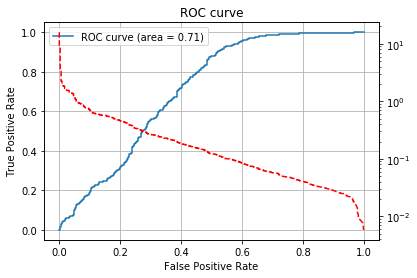

In [100]:
auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(fpr, thresholds, markeredgecolor='r',linestyle='dashed', color='r')
ax2 = plt.yscale("log")
#ax2.set_ylabel('Threshold',color='r')
#ax2.set_ylim([thresholds[-1],thresholds[0]])
#ax2.set_xlim([fpr[0],fpr[-1]])
 

In [26]:
pd.DataFrame([tpr, fpr, thresholds])

0         1         2         3         4         5         6     \
0   0.000088  0.001143  0.001143  0.003606  0.003606  0.004310  0.004310   
1   0.000000  0.000000  0.001368  0.001368  0.002736  0.002736  0.004104   
2  15.635705  7.784349  7.595344  4.681563  4.591581  4.319258  4.309397   

       7         8         9         10        11        12        13    \
0  0.007564  0.007564  0.019967  0.019967  0.020406  0.020406  0.022429   
1  0.004104  0.005472  0.005472  0.006840  0.006840  0.008208  0.008208   
2  3.411848  3.403843  2.164122  2.163542  2.136999  2.136174  2.077720   

       14        15        16        17        18        19        20    \
0  0.022429  0.023485  0.023485  0.024804  0.024804  0.025332  0.025332   
1  0.009576  0.009576  0.010944  0.010944  0.012312  0.012312  0.013680   
2  2.068343  2.019418  2.012847  1.962561  1.960853  1.935477  1.930577   

       21        22        23        24        25        26        27    \
0  0.025684  0.025684  0.033776  0.033776  0.034568  0.034568  0.039669   
1  0.013680  0.015048  0.015048  0.016416  0.016416  0.017784  0.017784   
2  1.923858  1.916421  1.667255  1.664986  1.648340  1.648281  1.564923   

       28        29        30        31        32        33        34    \
0  0.039669  0.040461  0.040461  0.050224  0.050224  0.052335  0.052335   
1  0.019152  0.019152  0.020520  0.020520  0.023256  0.023256  0.024624   
2  1.563013  1.548554  1.547353  1.390240  1.387880  1.367990  1.367476   

       35        36        37        38        39        40        41    \
0  0.059724  0.059724  0.062011  0.062011  0.066673  0.066673  0.067112   
1  0.024624  0.025992  0.025992  0.027360  0.027360  0.030096  0.030096   
2  1.264466  1.263389  1.232862  1.230953  1.172593  1.172144  1.167518   

       42        43        44        45        46        47        48    \
0  0.067112  0.068168  0.068168  0.068871  0.068871  0.078195  0.078195   
1  0.031464  0.031464  0.032832  0.032832  0.034200  0.034200  0.035568   
2  1.167053  1.156360  1.155937  1.150911  1.150607  1.079302  1.077678   

       49        50        51        52        53        54        55    \
0  0.080130  0.080130  0.080746  0.080746  0.082945  0.082945  0.083385   
1  0.035568  0.036936  0.036936  0.038304  0.038304  0.039672  0.039672   
2  1.058719  1.056707  1.052865  1.049103  1.030554  1.028844  1.026175   

       56        57        58        59        60        61        62    \
0  0.083385  0.084352  0.084352  0.085232  0.085232  0.086287  0.086287   
1  0.041040  0.041040  0.042408  0.042408  0.043776  0.043776  0.045144   
2  1.026104  1.021942  1.020981  1.015458  1.015156  1.008022  1.007991   

       63        64        65        66        67        68        69    \
0  0.104319  0.104319  0.109772  0.109772  0.110916  0.110916  0.112059   
1  0.045144  0.046512  0.046512  0.047880  0.047880  0.049248  0.049248   
2  0.901359  0.900850  0.873544  0.872890  0.864749  0.864346  0.860233   

       70        71        72        73        74        75        76    \
0  0.112059  0.112587  0.112587  0.113906  0.113906  0.114962  0.114962   
1  0.050616  0.050616  0.051984  0.051984  0.053352  0.053352  0.054720   
2  0.860049  0.855957  0.855848  0.848333  0.848260  0.841757  0.841722   

       77        78        79        80        81        82        83    \
0  0.117249  0.117249  0.126045  0.126045  0.127364  0.127364  0.129299   
1  0.054720  0.056088  0.056088  0.057456  0.057456  0.060192  0.060192   
2  0.828564  0.828150  0.787762  0.787691  0.782025  0.781027  0.773113   

       84        85        86        87        88        89        90    \
0  0.129299  0.133433  0.133433  0.133521  0.133521  0.139238  0.139238   
1  0.061560  0.061560  0.062927  0.062927  0.064295  0.064295  0.065663   
2  0.772916  0.756484  0.756271  0.755352  0.754422  0.731421  0.731383   

       91        92        93        94        95        96        97    \
0  0.145219  0.1